In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df.duplicated().sum()


529

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
len(df)

13320

## Remove Duplicates Value

In [6]:
df = df.drop_duplicates()

In [7]:
len(df)

12791

In [8]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

## Remove Society

In [9]:
df.drop(columns=['society'],inplace=True)

## Null Value Treatment

In [10]:
df.isna().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

In [11]:
df['bath'].fillna(df['bath'].median(),inplace=True)

In [12]:
df['balcony'].fillna(df['balcony'].median(),inplace=True)

In [13]:
df.isna().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [14]:
dt = df.dropna()

In [15]:
len(dt)

12774

In [16]:
df = dt

In [17]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_19664\4207564571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

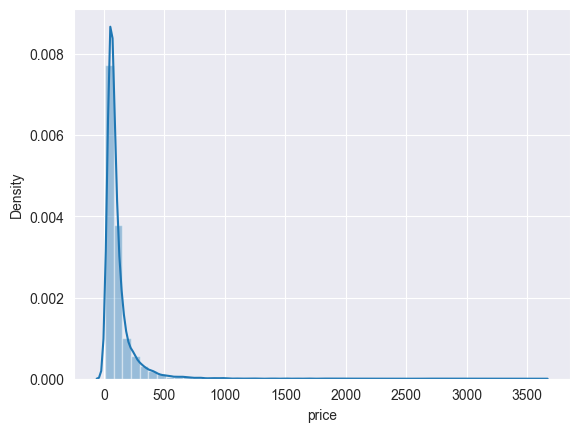

In [18]:
sns.distplot(df['price'])

## Columns Transformation

### Area Type

In [19]:
df['area_type'].value_counts()
n1 = df['area_type'].str.split(n=1,expand=True)
n1

,0,1
0,Super,built-up Area
1,Plot,Area
2,Built-up,Area
3,Super,built-up Area
4,Super,built-up Area
...,...,...
13314,Super,built-up Area
13315,Built-up,Area
13316,Super,built-up Area
13317,Built-up,Area


In [20]:
df['area'] = n1[0]

In [21]:
df['area_type'] = df['area']
df.drop(columns='area',inplace=True)

In [22]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,Super,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00


<Axes: xlabel='area_type', ylabel='price'>

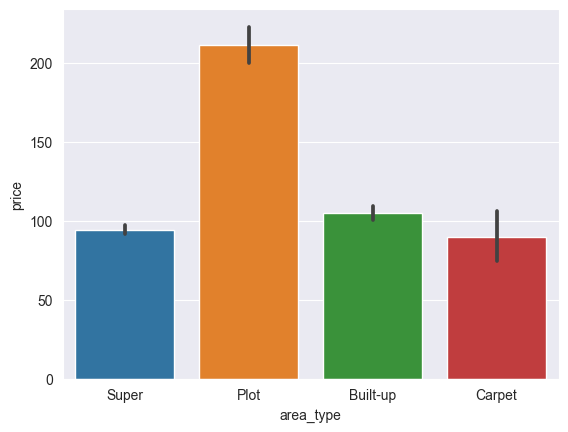

In [23]:
sns.barplot(x=df['area_type'],y=df['price'])

### Availability

In [24]:
df['availability'].value_counts()

availability
Ready To Move    10171
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 80, dtype: int64

<Axes: xlabel='availability', ylabel='price'>

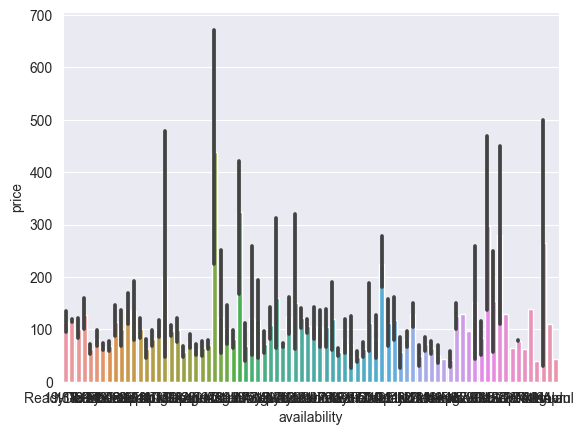

In [25]:
sns.barplot(x = df['availability'],y=df['price'])

In [26]:
df.drop(columns=['availability'],inplace=True)

In [27]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13314,Super,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00


### Location

In [28]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

<Axes: xlabel='location', ylabel='price'>

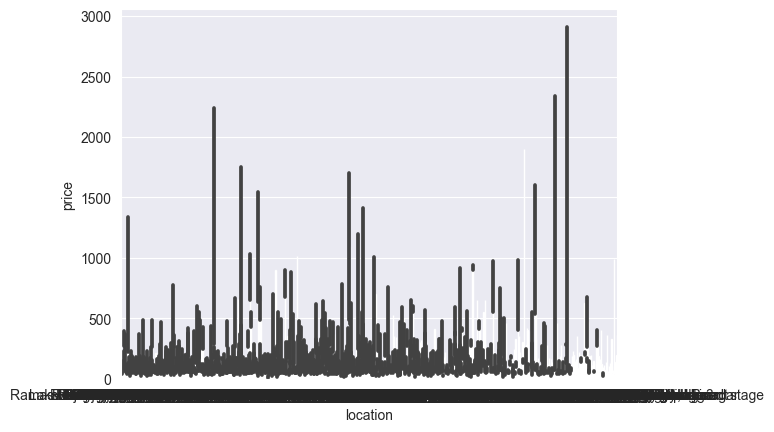

In [29]:
sns.barplot(x=df['location'],y=df['price'])

### Size

In [30]:
df['size'].value_counts()

size
2 BHK         4931
3 BHK         4119
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [31]:
df['size'].astype(str)

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13314        3 BHK
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
Name: size, Length: 12774, dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12774 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12774 non-null  object 
 1   location    12774 non-null  object 
 2   size        12774 non-null  object 
 3   total_sqft  12774 non-null  object 
 4   bath        12774 non-null  float64
 5   balcony     12774 non-null  float64
 6   price       12774 non-null  float64
dtypes: float64(3), object(4)
memory usage: 798.4+ KB


In [33]:
n1 = df['size'].str.split(n=1,expand=True)

In [34]:
df['new'] = n1[0]

In [35]:
df['new'] = df['new'].astype(float)

In [36]:
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
Index: 12774 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12774 non-null  object 
 1   location    12774 non-null  object 
 2   size        12774 non-null  object 
 3   total_sqft  12774 non-null  object 
 4   bath        12774 non-null  float64
 5   balcony     12774 non-null  float64
 6   price       12774 non-null  float64
 7   new         12774 non-null  float64
dtypes: float64(4), object(4)
memory usage: 898.2+ KB


12774

In [37]:
df = df[df['new']<10]

In [38]:
len(df)

12748

In [39]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '9 BHK',
       '9 Bedroom', '8 BHK'], dtype=object)

In [40]:
df.drop(columns=['new'],inplace = True)

C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_19664\1376375442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['new'],inplace = True)


### Square Ft

In [41]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13314,Super,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00


In [42]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [43]:
df = df[df['total_sqft'].str.isnumeric()]

In [44]:
df['total_sqft'] = df['total_sqft'].astype(float)

C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_19664\658097423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].astype(float)


In [45]:
len(df)

12424

In [46]:
df['total_sqft'].value_counts()

total_sqft
1200.0    800
1100.0    210
1500.0    201
2400.0    194
600.0     178
         ... 
1793.0      1
1551.0      1
3563.0      1
462.0       1
4689.0      1
Name: count, Length: 1816, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12424 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12424 non-null  object 
 1   location    12424 non-null  object 
 2   size        12424 non-null  object 
 3   total_sqft  12424 non-null  float64
 4   bath        12424 non-null  float64
 5   balcony     12424 non-null  float64
 6   price       12424 non-null  float64
dtypes: float64(4), object(3)
memory usage: 776.5+ KB


In [48]:
df = df[df['total_sqft'] > 300]

In [49]:
len(df)

12412

### Bath

In [50]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super,Kothanur,2 BHK,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13314,Super,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00
13315,Built-up,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00
13316,Super,Richards Town,4 BHK,3600.0,5.0,2.0,400.00
13317,Built-up,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00


In [51]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 12.,
       13.])

In [52]:
df['bath'].value_counts()

bath
2.0     6461
3.0     3109
4.0     1166
1.0      709
5.0      504
6.0      251
7.0       98
8.0       63
9.0       37
10.0       7
12.0       4
11.0       1
14.0       1
13.0       1
Name: count, dtype: int64

In [53]:
df = df[df['bath'] <= 7]

In [54]:
df['bath'].unique()

array([2., 5., 3., 4., 6., 1., 7.])

In [55]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super,Kothanur,2 BHK,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13314,Super,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00
13315,Built-up,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00
13316,Super,Richards Town,4 BHK,3600.0,5.0,2.0,400.00
13317,Built-up,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00


### Balcony

In [56]:
df['balcony'].unique()

array([1., 3., 2., 0.])

### convert price doller to INR

In [57]:
df['price'] = df['price']*82.4

C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_19664\1560334828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price']*82.4


In [58]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12298 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12298 non-null  object 
 1   location    12298 non-null  object 
 2   size        12298 non-null  object 
 3   total_sqft  12298 non-null  float64
 4   bath        12298 non-null  float64
 5   balcony     12298 non-null  float64
 6   price       12298 non-null  float64
dtypes: float64(4), object(3)
memory usage: 768.6+ KB


# Model Implementation

In [59]:
X = df.drop(columns='price')
y = df['price']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import  make_pipeline
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso

In [61]:
ohe=OneHotEncoder()
ohe.fit(X[['area_type','location','size']])

OneHotEncoder()

In [62]:
colums_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['area_type','location','size']),remainder='passthrough')

In [63]:
report = pd.DataFrame(columns=['     Model         ','   R2_score(%)  '])

## Linear Model

In [64]:
score = []

for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(colums_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    score.append(r2_score(y_test,y_pred))
mi = np.argmax(score)
print(mi)
mx = score[mi]
report.loc['1']=['Linear regression',mx*100]

72


## Ridge Model

In [65]:
report.loc['2'] = ['Ridge',61.31]

In [66]:
report

,Model,R2_score(%)
1,Linear regression,66.404986
2,Ridge,61.310000


In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=72)

In [68]:
scores = []
l1 = [0.1,0.01,0.001,1,0.00001]
for i in l1:
    l = Lasso(alpha=i)
    pipe = make_pipeline(colums_trans,l)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred)*100)
mi = np.argmax(scores)
mxS = scores[mi]
mxa = l1[mi]
print(mxS,mxa)
report.loc['3'] = ['Lesso',mxS]

F:\Machine learning python\ML Advance alogrithms\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50591109820.00537, tolerance: 151484692.03707328
  model = cd_fast.sparse_enet_coordinate_descent(
F:\Machine learning python\ML Advance alogrithms\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254665163547.62592, tolerance: 151484692.03707328
  model = cd_fast.sparse_enet_coordinate_descent(


67.16694800016295 1


F:\Machine learning python\ML Advance alogrithms\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222094747061.89566, tolerance: 151484692.03707328
  model = cd_fast.sparse_enet_coordinate_descent(


In [69]:
report

,Model,R2_score(%)
1,Linear regression,66.404986
2,Ridge,61.310000
3,Lesso,67.166948


In [70]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(1,20):
    m = KNeighborsRegressor(n_neighbors=i)
    pipe = make_pipeline(colums_trans,m)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_pred,y_test))
mi = np.argmax(scores)
mx = scores[mi]
print(mx,mi)
report.loc['4'] = ['KNN',mx*100]

0.4293697737433745 1


In [71]:
report.loc['5'] = ['Random Forest',r2_score(y_test,y_pred)*100]

In [72]:
report

,Model,R2_score(%)
1,Linear regression,66.404986
2,Ridge,61.310000
3,Lesso,67.166948
4,KNN,42.936977
5,Random Forest,58.106110


In [73]:
from xgboost import XGBRegressor

x = XGBRegressor(n_estimators=500)
pipe = make_pipeline(colums_trans,x)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
report.loc['6'] = ['Xg Boost',r2_score(y_test,y_pred)*100]

0.7301181779638637


In [74]:
report

,Model,R2_score(%)
1,Linear regression,66.404986
2,Ridge,61.310000
3,Lesso,67.166948
4,KNN,42.936977
5,Random Forest,58.106110
6,Xg Boost,73.011818


In [75]:
from sklearn.ensemble import GradientBoostingRegressor
g = GradientBoostingRegressor()
pipe = make_pipeline(colums_trans,g)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))

0.6854647923111508


In [76]:
from sklearn.ensemble import AdaBoostRegressor
a = AdaBoostRegressor()
pipe = make_pipeline(colums_trans,a)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))

-0.24254889798246015


In [77]:
from sklearn.ensemble import ExtraTreesRegressor
e = ExtraTreesRegressor(n_estimators=100,max_depth=32)
pipe = make_pipeline(colums_trans,e)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))

0.7618597110358355


In [78]:
report.loc['7']=['ExtraTree',r2_score(y_test,y_pred)*100]

In [79]:
import pickle

In [80]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [81]:
pipe.predict(pd.DataFrame([['Plot','Gandhi Bazar','3 BHK','1400.0','2.0','1.0']],columns=['area_type','location','size','total_sqft','bath','balcony']))

array([6345.22105709])

In [82]:
df['area_type'].unique()

array(['Super', 'Plot', 'Built-up', 'Carpet'], dtype=object)

In [83]:
df.to_csv('Cleaned_data.csv')